<p align="center">
  <img src="./mne_logo.jpg" alt="image" width="50%" height="auto" />
</p>

# MNE-Python Workshop
Cutting EEG Conference                 
Presentation by: Sara Rostami, Alireza Mahdavi
***

## Part 2: EEG/ERP Visualization and Time-Frequency Analysis

### 1. load the segmented dataset

In [35]:
%matplotlib inline
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fname = "oddball-epo.fif"

epochs = mne.read_epochs(fname)

Reading s:\Work\M.S\CuttingEEG-Conference\mne_workshop\oddball-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -200.00 ...     500.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
212 matching events found
No baseline correction applied
0 projection items activated


In [2]:
epochs.info

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 Stimulus
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 20.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 100.0 Hz
>

In [3]:
epochs.get_data().shape

(212, 64, 71)

### 2. Visually Inspect ERPs

Finally, if we average an epoched dataset over trials, we can use the `mne.Evoked` object.

In [4]:
target = epochs["target"].average()
target

<Evoked | 'target/stimulus' (average, N=106), -0.2 – 0.5 sec, baseline -0.2 – 0 sec, 63 ch, ~103 kB>

In [5]:
dir(target)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__neg__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_aspect_kind',
 '_data',
 '_get_channel_positions',
 '_handle_tmin_tmax',
 '_pick_drop_channels',
 '_pick_projs',
 '_projector',
 '_reconstruct_proj',
 '_set_channel_positions',
 '_size',
 '_update_first_last',
 'add_channels',
 'add_proj',
 'add_reference_channels',
 'animate_topomap',
 'anonymize',
 'apply_baseline',
 'apply_function',
 'apply_hilbert',
 'apply_proj',
 'as_type',
 'baseline',
 'ch_names',
 'comment',
 'compensation_grade',
 'copy',
 'crop',
 'data',
 'decimate',
 'del_proj',
 'detrend',
 'drop_channels',
 'filter',
 'first',
 'get_channel_types',
 'get_data',
 'get_montage'

In [6]:
target.get_data().shape

(63, 71)

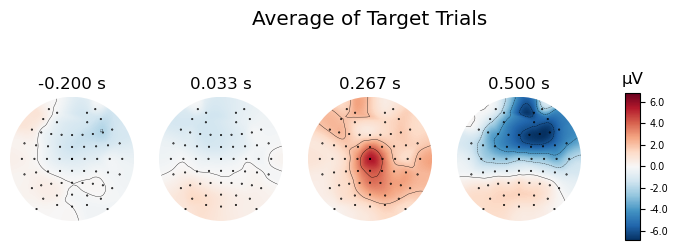

In [7]:
target.plot_topomap(title= 'Average of Target Trials');#,times=[0.1,0.2,0.3,0.4,0.5]);

In [8]:
standard = epochs["standard"].average()

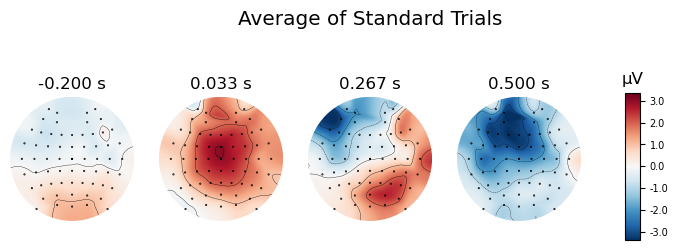

In [9]:
standard.plot_topomap(title= 'Average of Standard Trials');#, times=[0.1,0.2,0.3,0.4,0.5]);

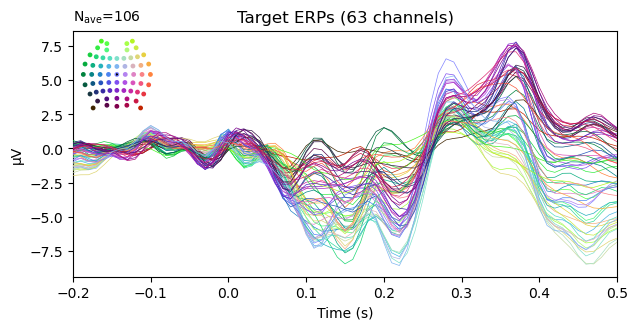

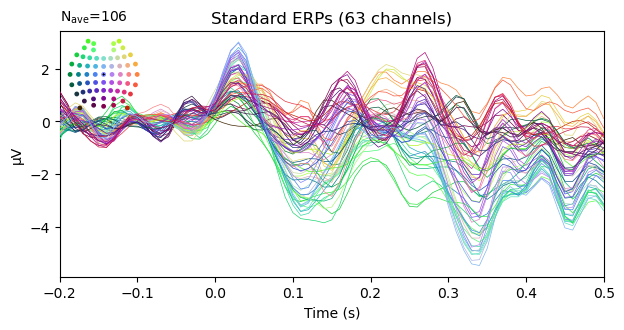

In [79]:
target.plot(spatial_colors=True, window_title= "Target Channel ERPs", titles="Target ERPs");
standard.plot(spatial_colors=True, window_title= "Standard Channel ERPs",titles="Standard ERPs");

To quickly investigate evoked activity, the `Evoked` object has a number of plotting functions available.

No projector specified for this dataset. Please consider the method self.add_proj.


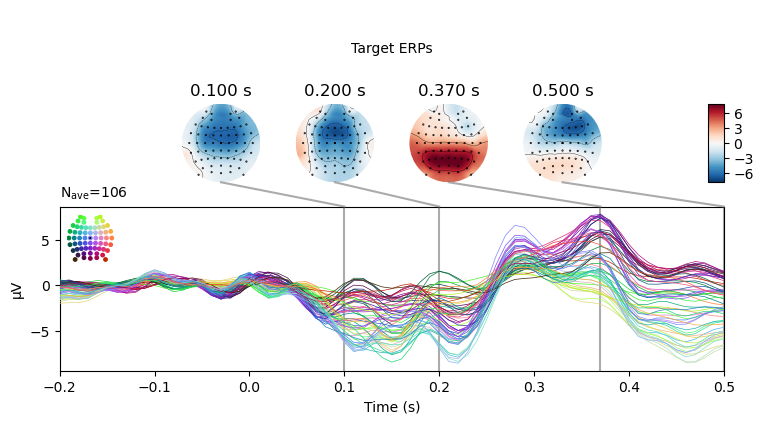

In [13]:
target.plot_joint(times=[0.1,0.2,0.37,0.5], title="Target ERPs");

For condition contrasts, you can use `mne.combine.evoked`:

No projector specified for this dataset. Please consider the method self.add_proj.


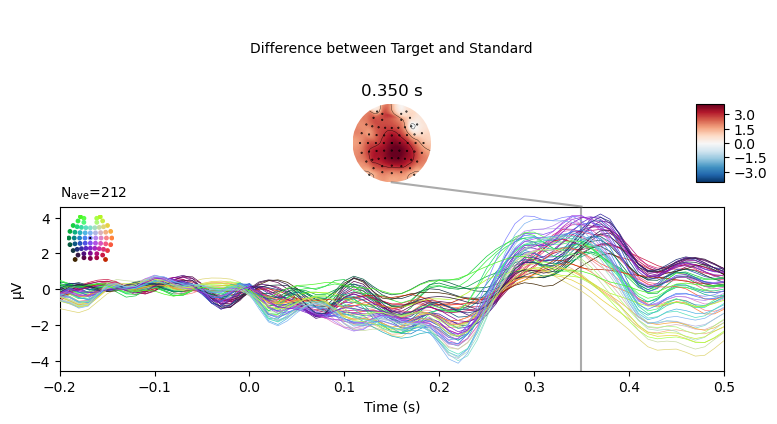

In [14]:
diff = mne.combine_evoked((target, -standard), weights='equal')
diff.plot_joint(times=.35, title='Difference between Target and Standard');

Or as an image:

#### We can plot the difference between Target and Non-Target ERPs as a `Heatmap`

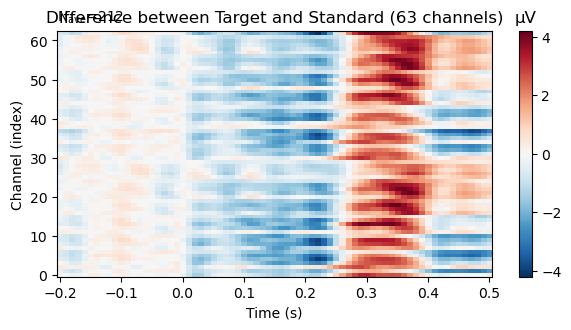

In [17]:
diff.plot_image(titles="Difference between Target and Standard");

- Because we have a 10/20 electrode layout, we can easily use a somewhat nicer layout, and split all the electrodes to left and right hemispheres according to a midline

In [19]:
rois = mne.channels.make_1020_channel_selections(diff.info, midline="z12")
rois

{'Left': array([25, 57, 58, 20, 53, 21, 48, 16, 49, 12, 44, 11, 40,  7, 39,  3, 34,
         2, 31, 30]),
 'Midline': array([27, 28, 26, 59, 54, 55, 22, 17, 18, 50, 46, 13, 45, 62,  9,  8,  4,
        36, 35,  1,  0, 38, 43]),
 'Right': array([29, 61, 60, 24, 56, 23, 52, 19, 51, 14, 15, 47, 41, 10, 42,  5, 37,
         6, 32, 33])}

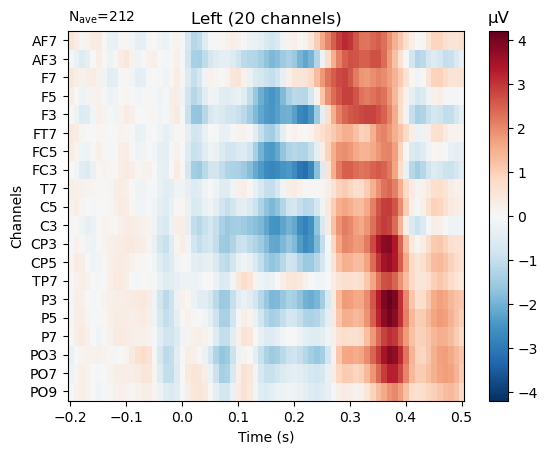

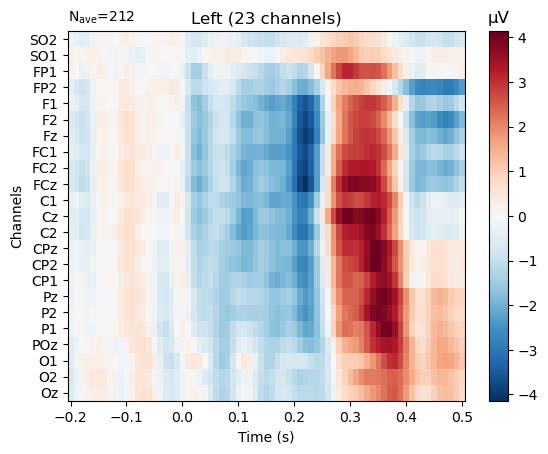

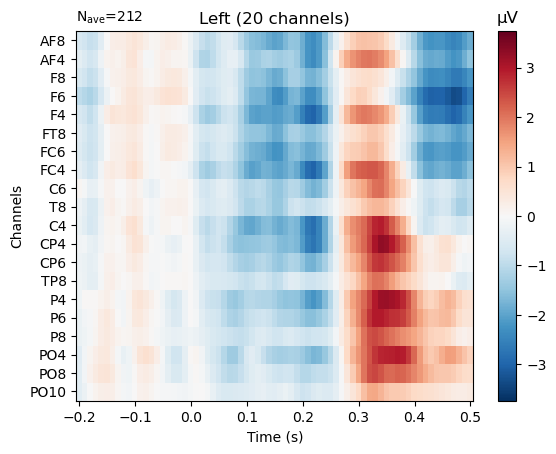

In [22]:
diff.plot_image(group_by=rois, show=False, show_names="all");

### We can compare multiple conditions using the `mne.viz.plot_compare_evokeds` function

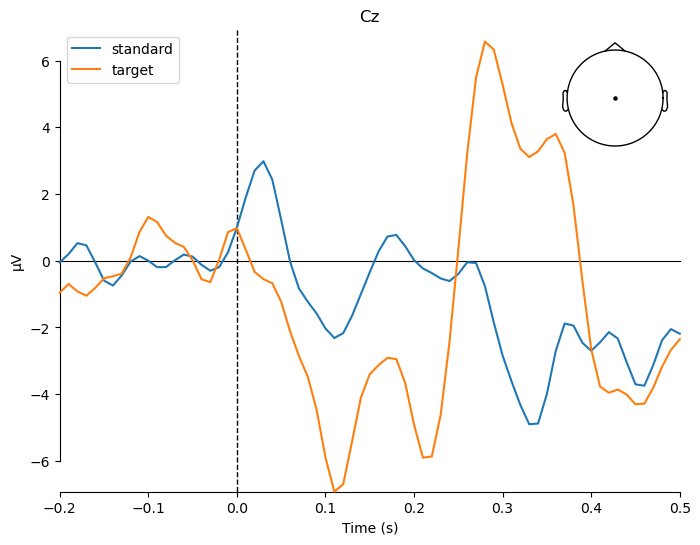

In [24]:
mne.viz.plot_compare_evokeds({"standard": standard,
                              "target": target}, picks=[13]);

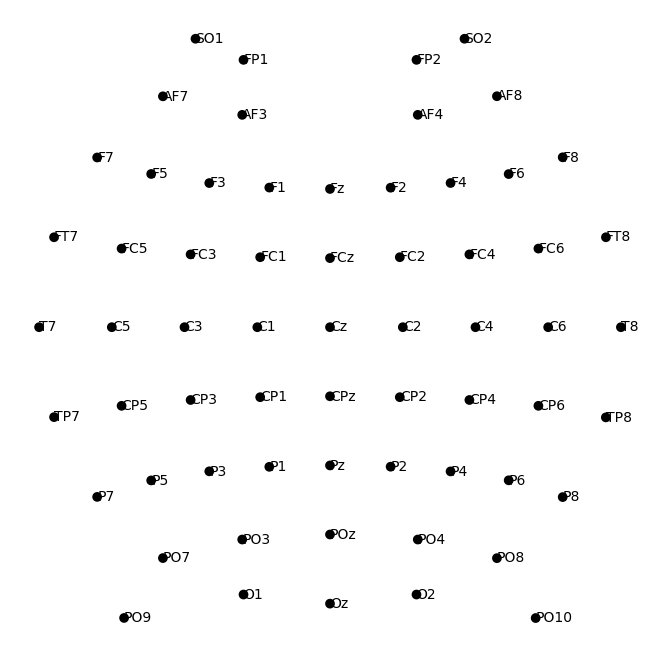

In [25]:
target.plot_sensors(show_names=True)
plt.show();

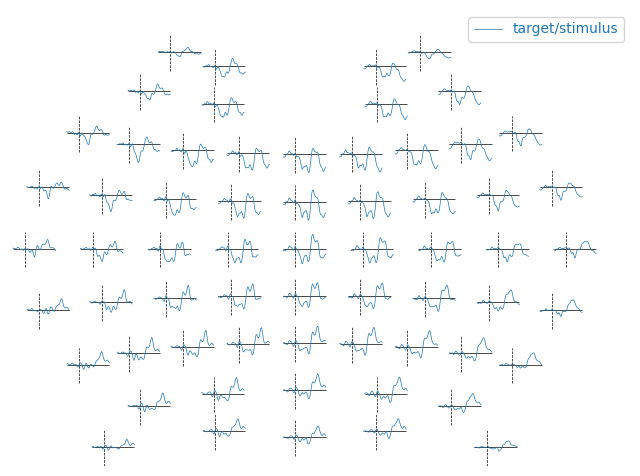

In [26]:
target.plot_topo();

### We can also visualize the ERPs using `matplotlib`

In [27]:
X = target.data
ch_names = target.info['ch_names']

In [28]:
channel = 'C4'
ch_inx = [i for i,j in enumerate(ch_names) if j == channel]

In [63]:
for (i,j) in enumerate(ch_names):
    print(i,j)

0 FP1
1 FP2
2 F7
3 F3
4 Fz
5 F4
6 F8
7 FC5
8 FC1
9 FC2
10 FC6
11 T7
12 C3
13 Cz
14 C4
15 T8
16 CP5
17 CP1
18 CP2
19 CP6
20 P7
21 P3
22 Pz
23 P4
24 P8
25 PO9
26 O1
27 Oz
28 O2
29 PO10
30 AF7
31 AF3
32 AF4
33 AF8
34 F5
35 F1
36 F2
37 F6
38 SO1
39 FT7
40 FC3
41 FC4
42 FT8
43 SO2
44 C5
45 C1
46 C2
47 C6
48 TP7
49 CP3
50 CPz
51 CP4
52 TP8
53 P5
54 P1
55 P2
56 P6
57 PO7
58 PO3
59 POz
60 PO4
61 PO8
62 FCz


In [47]:
list(epochs.times)[::2]

[-0.2,
 -0.19,
 -0.18,
 -0.17,
 -0.16,
 -0.15,
 -0.14,
 -0.13,
 -0.12,
 -0.11,
 -0.1,
 -0.09,
 -0.08,
 -0.07,
 -0.06,
 -0.05,
 -0.04,
 -0.03,
 -0.02,
 -0.01,
 0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5]

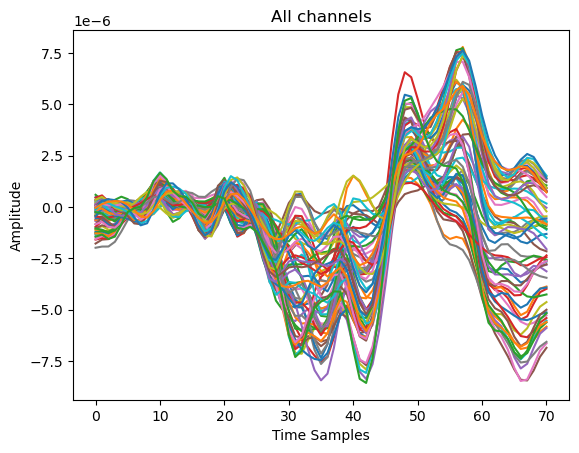

In [49]:
plt.Figure(figsize=(12,10))
plt.plot(X.T) #X[ch_inx[0],:]
plt.title("All channels")#channel
plt.ylabel("Amplitude")
plt.xlabel("Time Samples");

### 3. Time-Frequency Analysis

For an overview over the spectral shape of the data, we can use the method `raw.plot_psd` to plot the `Power Spectrum Density` of the data:

In [51]:
epochs_for_tfr = mne.read_epochs("oddball-long-epo.fif")

Reading s:\Work\M.S\CuttingEEG-Conference\mne_workshop\oddball-long-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
212 matching events found
No baseline correction applied
0 projection items activated


### Power Spectrum Density (PSD) Plot

    Using multitaper spectrum estimation with 7 DPSS windows


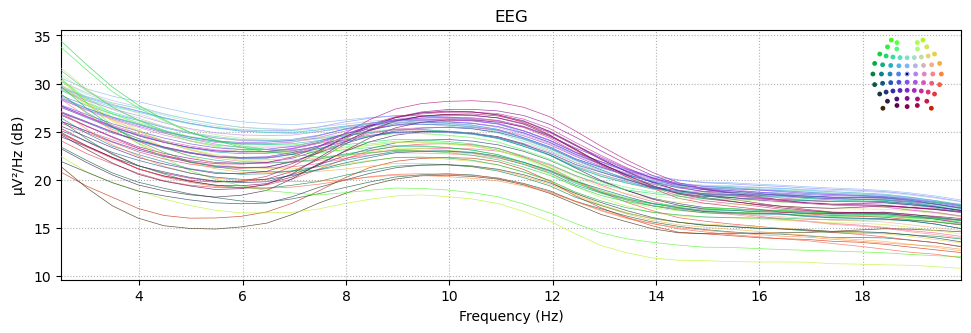

In [80]:
epochs_for_tfr.plot_psd(fmin=2, fmax=20);#picks=[27,1]

But what about the time/frequency correlates of the Oddball effect?

We will extract power per time and frequency with Morlet wavelets.

In [66]:
from mne.time_frequency import tfr_morlet

In [68]:
freqs = list(range(3, 20))
tfr_target = tfr_morlet(epochs_for_tfr["target"], freqs, 3, return_itc=False)
tfr_standard = tfr_morlet(epochs_for_tfr["standard"], freqs, 3, return_itc=False)

(channel, frequency range, time samples)

In [69]:
tfr_target.data.shape

(63, 17, 201)

Visualize Time-Frequency Target ERPs

No baseline correction applied


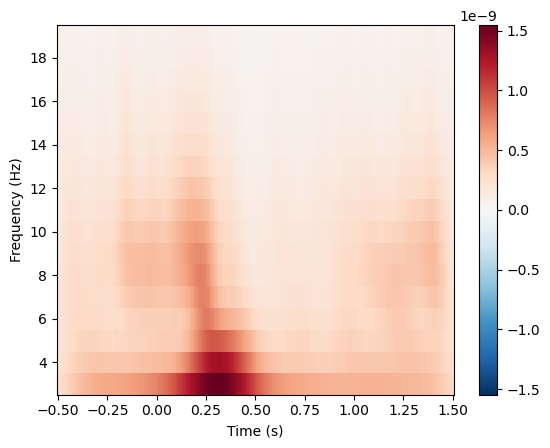

In [70]:
tfr_target.plot(picks=[8]);

Time-frequency data (single trial or averaged) is stored in TFR objects. These objects behave in many ways like Evoked objects ...

In [77]:
tfr_contrast = mne.combine_evoked((tfr_standard, tfr_target), weights=(-.5, .5))#
tfr_contrast.apply_baseline((None, 0))

Applying baseline correction (mode: mean)


<AverageTFR | time : [-0.500000, 1.500000], freq : [3.000000, 19.000000], nave : 212, channels : 63, ~1.7 MB>

### Plotting time-frequency activity (`Event-Related Spectral Perturbations`): 
- observe the alpha-band ERD and the time-frequency correlates of the P3 effect.

No baseline correction applied
No baseline correction applied


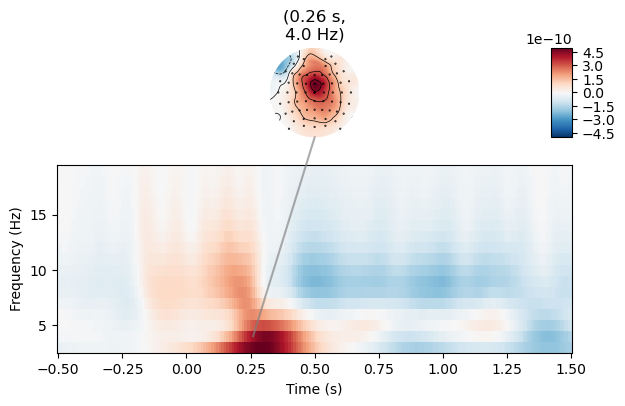

In [74]:
tfr_contrast.plot_joint();

From the above plot, we can understand where in Time and Frequency, we have a significant difference between the two conditions

No baseline correction applied


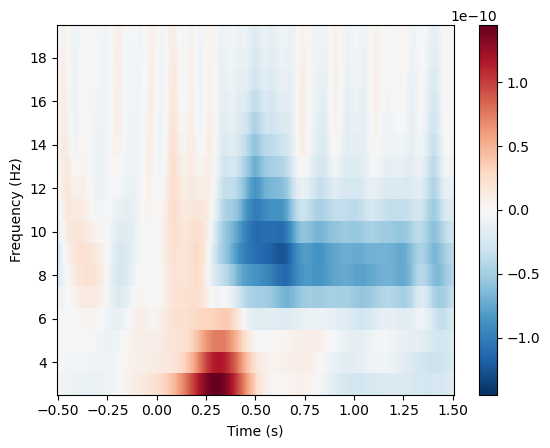

In [82]:
tfr_contrast.plot(picks=[27]);

In [ ]:
del epochs_for_tfr

### 4. Statistical Testing

Remember what the data look like:

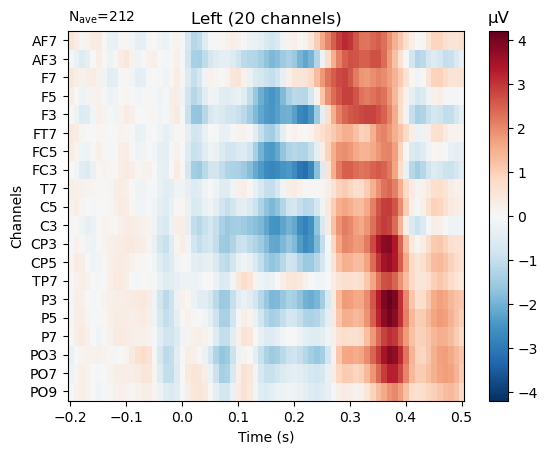

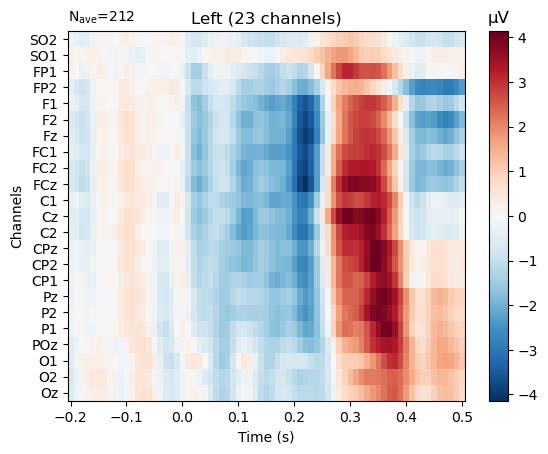

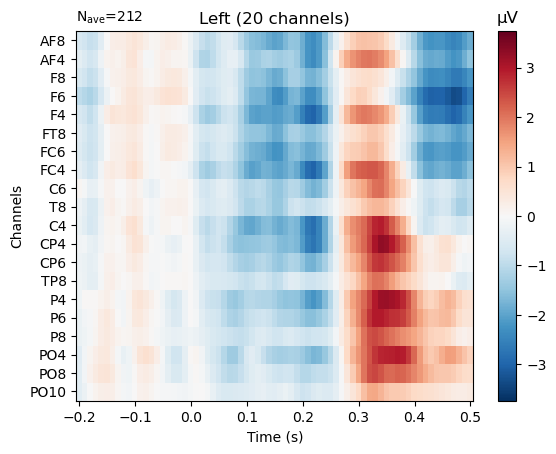

In [83]:
diff.plot_image(group_by=rois, show=False, show_names="all");

Can we statistically threshold this image to see which effects are reliable?

### Cluster-based permutation stats

<details>
<summary>
<span style="color:red;"><b>Q: </span> <span style="color:yellow;"> What is Cluster-based Permuatation Test in the context of EEG data?</b> </span>
</summary>
<br>
<span style="color:green;"><b>It basically answers the question:</span> <span style="color:purple;">At what time, and at what electrodes, was there a significant difference between conditions?</span></b>
<br>
You can use this test, when you don't have prior knowledge about at which electrodes and points in time, a difference between the two conditions might exist. This approach controls for the multiple-comparison problem that you might run into, if you try to use a simpler approach (i.e. multiple t-tests).</br>
</details>

Exploratory analysis with nonparametric control of the error rate is commonly done with
cluster-based permutation tests (i.e., Maris 2012). To cluster across space, we first need a
channel adjacency matrix.

In [93]:
from mne.channels import find_ch_adjacency, make_1020_channel_selections
from mne.viz import plot_channel_labels_circle
find_ch_adjacency?

Signature: find_ch_adjacency(info, ch_type)
Docstring:
Find the adjacency matrix for the given channels.

This function tries to infer the appropriate adjacency matrix template
for the given channels. If a template is not found, the adjacency matrix
is computed using Delaunay triangulation based on 2d sensor locations.

Parameters
----------

info : mne.Info
    The :class:`mne.Info` object with information about the sensors and methods of measurement.
ch_type : str | None
    The channel type for computing the adjacency matrix. Currently
    supports 'mag', 'grad', 'eeg' and None. If None, the info must contain
    only one channel type.

Returns
-------
ch_adjacency : scipy.sparse.csr_matrix, shape (n_channels, n_channels)
    The adjacency matrix.
ch_names : list
    The list of channel names present in adjacency matrix.

See Also
--------
read_ch_adjacency

Notes
-----
.. versionadded:: 0.15

Automatic detection of an appropriate adjacency matrix template only
works for MEG data at

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 63


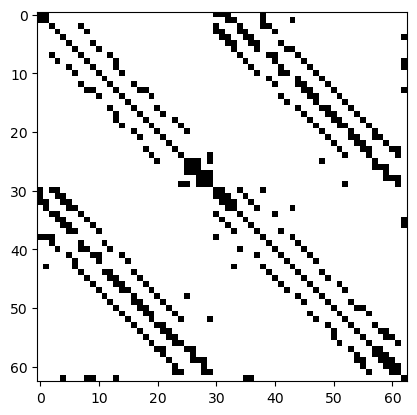

In [94]:
#find_ch_connectivity
connectivity, ch_names = find_ch_adjacency(epochs.info, ch_type='eeg')
plt.imshow(connectivity.toarray(), cmap="Greys");

In [95]:
adjacency, ch_names = find_ch_adjacency(epochs.info, ch_type='eeg')
print(type(adjacency))
# plot_channel_labels_circle(epochs.info, adjacency, ch_names);

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 63
<class 'scipy.sparse.csr.csr_matrix'>


Now we need the data in the right shape. Sadly, because the space dimension needs
to be last, we need to manually swap the time and space axes.

In [96]:
epochs.pick_types(eeg=True)
target_epochs, standard_epochs = epochs["target"].get_data(), epochs["standard"].get_data()
target_epochs.shape, standard_epochs.shape

((106, 63, 71), (106, 63, 71))

In [97]:
target_epochs = target_epochs.swapaxes(1, 2)
standard_epochs = standard_epochs.swapaxes(1, 2)
target_epochs.shape, standard_epochs.shape

((106, 71, 63), (106, 71, 63))

MNE has various cluster-based permutation test options. Here, we test for single-trial
differences between conditions with `mne.stats.spatio_temporal_cluster_test`.

We use threshold-free cluster enhancement to reduce the number of parameters.

Warning: the next cell takes a lot of time and computational power.

In [99]:
# Calculate adjacency matrix between sensors from their locations
# adjacency, _ = find_ch_adjacency(epochs.info, "eeg")
from mne.stats import spatio_temporal_cluster_test
# Extract data: transpose because the cluster test requires channels to be last
# In this case, inference is done over items. In the same manner, we could
# also conduct the test over, e.g., subjects.
X = [
    standard_epochs,
    target_epochs,
]
tfce = dict(start=0.1, step=0.2)  # ideally start and step would be smaller

# Calculate statistical thresholds
t_obs, clusters, cluster_pv, h0 = spatio_temporal_cluster_test(
    X, tfce, adjacency=adjacency, n_permutations=1000
)  # a more standard number would be 1000+
significant_points = cluster_pv.reshape(t_obs.shape).T < 0.05
print(str(significant_points.sum()) + " points selected by TFCE ...")

stat_fun(H1): min=0.000000 max=75.314187
Running initial clustering
Using 377 thresholds from 0.10 to 75.30 for TFCE computation (h_power=2.00, e_power=0.50)


Found 4473 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
1601 points selected by TFCE ...


In [100]:
import numpy as np
np.mean(standard_epochs, axis=0).shape

(71, 63)

No projector specified for this dataset. Please consider the method self.add_proj.


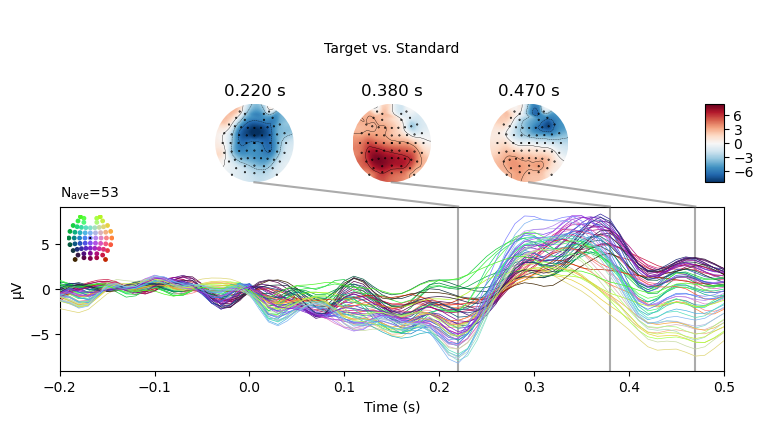

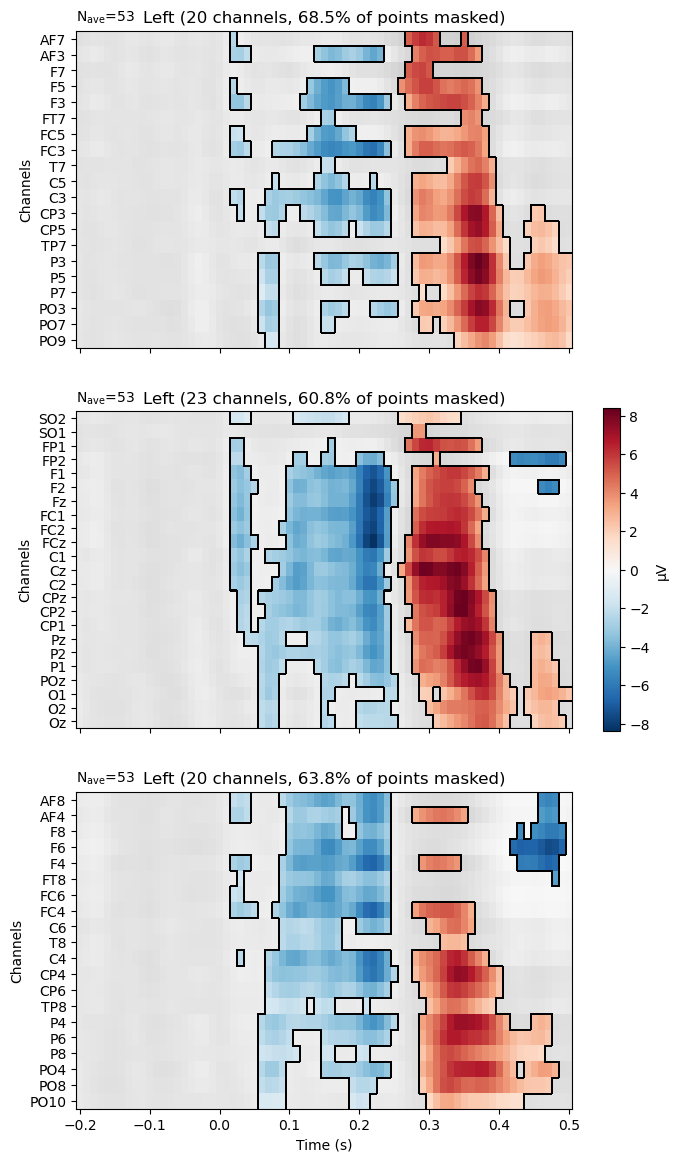

In [101]:
# We need an evoked object to plot the image to be masked
evoked = mne.combine_evoked(
    (target, standard), weights=[1, -1]
)  # calculate difference wave
time_unit = dict(time_unit="s")
evoked.plot_joint(
    title="Target vs. Standard", ts_args=time_unit, topomap_args=time_unit
)  # show difference wave

# Create ROIs by checking channel labels
selections = make_1020_channel_selections(evoked.info, midline="12z")

# Visualize the results
fig, axes = plt.subplots(nrows=3, figsize=(8, 14))
axes = {sel: ax for sel, ax in zip(selections, axes.ravel())}
evoked.plot_image(
    axes=axes,
    group_by=selections,
    colorbar=False,
    show=False,
    mask=significant_points,
    show_names="all",
    titles=None,
    **time_unit
)
plt.colorbar(axes["Left"].images[-1], ax=list(axes.values()), shrink=0.3, label="µV")

plt.show()

Now we can visualise the *t* values over time and space ...

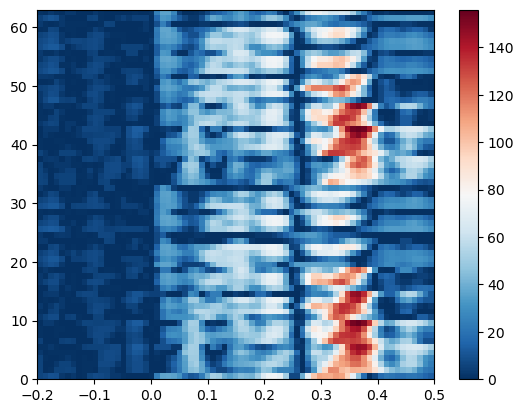

In [102]:
extent = (*epochs.times[[0, -1]], 0, len(epochs.ch_names))
im = plt.imshow(t_obs.T, aspect="auto", cmap="RdBu_r",
                 extent=extent
          ) #vmin=0, vmax=1,
plt.colorbar(im);

... and the p-values.

We can use the resulting mask to mask the image:

### Parametric stats
Sometimes, e.g. because we wish to test a specific hypothesis, cluster-based permutation tests are too much.
We can also simply access the data in array form and test with parametric (or nonparametric) tests.

For this, we first need to identify the spatial and temporal coordinates of an effect we want to test -
for example, the N2 at Cz.

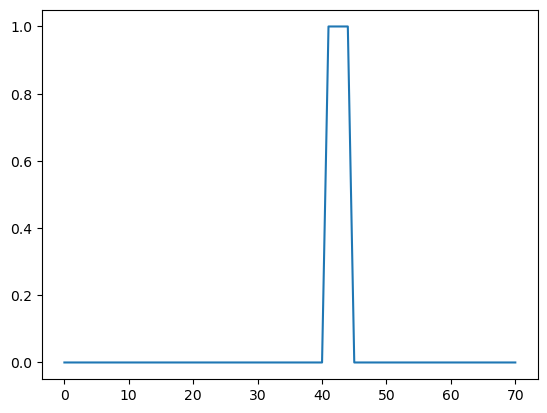

In [155]:
time_mask = (.2 < epochs.times) & (epochs.times < .25)
electrode_cz = epochs.ch_names.index("Cz")
plt.plot(time_mask)

In [156]:
epochs.times

array([-0.2 , -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12,
       -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03,
       -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,
        0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,
        0.16,  0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,
        0.25,  0.26,  0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,
        0.34,  0.35,  0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,
        0.43,  0.44,  0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ])

In [157]:
time_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

Now we extract the target data. Reminder: the shape of epochs data is (trial, channel, time)

In [158]:
epochs["target"].get_data().shape

(106, 63, 71)

In [159]:
cond_a = epochs["target"].get_data()[:, electrode_cz, time_mask].mean(-1)
cond_b = epochs["standard"].get_data()[:, electrode_cz, time_mask].mean(-1)

In [160]:
cond_a.shape

(106,)

Now we can simply use ordinary tests on these statistics.

In [163]:
from scipy.stats import ttest_ind, wilcoxon

In [164]:
ttest_ind(cond_a, cond_b)

Ttest_indResult(statistic=-3.185398761411968, pvalue=0.0016656107775993411)

In [165]:
wilcoxon(cond_a, cond_b)

WilcoxonResult(statistic=1726.0, pvalue=0.0004704838864446639)

### Exporting the Data as `Pandas DataFrame`

It is also straight-forward to convert the data into a (pandas) dataframe.

In [166]:
import pandas as pd

In [170]:
df = epochs.to_data_frame()
df

,time,condition,epoch,FP1,FP2,F7,F3,Fz,F4,F8,...,P5,P1,P2,P6,PO7,PO3,POz,PO4,PO8,FCz
0,-200,target/stimulus,7,-5.569638,-5.620327,-5.143945,-6.102057,-6.590915,-6.524084,-6.713595,...,-1.433939,-0.818473,-0.597176,2.593392,2.319078,1.453830,3.142563,4.574177,7.175357,-7.466380
1,-190,target/stimulus,7,-4.125365,-4.376233,-5.671656,-6.001161,-4.426533,-4.841483,-6.066758,...,-1.099729,-2.437520,-2.730614,-0.353572,1.928486,0.308712,1.540322,0.741531,3.446719,-4.393988
2,-180,target/stimulus,7,0.644387,0.442166,-2.787724,-0.234391,1.587101,1.352367,-2.675967,...,-0.287896,-1.384971,-1.557908,-2.366775,0.736857,0.386716,1.042359,-1.674911,-1.093497,2.462788
3,-170,target/stimulus,7,4.837009,5.683911,1.896734,6.945924,7.605806,7.687755,1.652572,...,2.275740,3.617918,3.101639,-1.440980,1.881173,3.893145,3.569512,0.222872,-2.681003,8.574202
4,-160,target/stimulus,7,5.234026,7.023589,4.889885,8.439270,8.961994,8.904087,3.517696,...,4.763212,7.378691,6.172418,0.893318,4.513822,7.163631,5.687698,3.577414,-1.161161,9.116045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15047,460,standard/stimulus,879,3.466180,7.780581,23.359991,3.675119,-3.455802,-3.538211,-2.211100,...,1.767491,0.824548,-0.243953,-1.079146,-2.135293,0.087291,4.774930,3.514230,-1.878429,-7.722742
15048,470,standard/stimulus,879,3.343216,8.847803,23.079405,5.299834,-1.771207,-3.460345,-1.497667,...,2.800059,2.985826,0.580967,-2.969902,-0.040434,1.423440,5.097619,2.085445,-2.780867,-4.382288
15049,480,standard/stimulus,879,5.246629,9.861480,23.898605,7.293133,0.839667,-0.794856,-1.270279,...,4.752051,5.394019,1.025941,-4.428536,3.381749,4.273975,5.393050,-0.003414,-3.840750,-1.543734
15050,490,standard/stimulus,879,7.457408,9.705962,24.936413,7.377740,1.062052,0.924668,-2.185649,...,4.132887,4.321704,-1.781239,-7.234539,3.244651,3.614669,1.720408,-4.976100,-7.220407,-2.717114


In [175]:
# df_cz = df.query("200 < time < 250")["Cz"].groupby(["epoch", "condition"]).mean().reset_index()
# df_cz.head()

df_cz = df.query("200 < time < 250").groupby(["epoch","condition"])["Cz"].mean().reset_index()
df_cz


,epoch,condition,Cz
0,7,target/stimulus,3.020595
1,8,standard/stimulus,2.480755
2,10,target/stimulus,-3.826423
3,11,standard/stimulus,3.490718
4,16,target/stimulus,-8.976194
...,...,...,...
207,874,target/stimulus,-7.528492
208,876,standard/stimulus,-8.104674
209,877,target/stimulus,-3.620409
210,878,target/stimulus,-13.275176


c:\Users\Sara Rostami.D\.conda\envs\base2\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


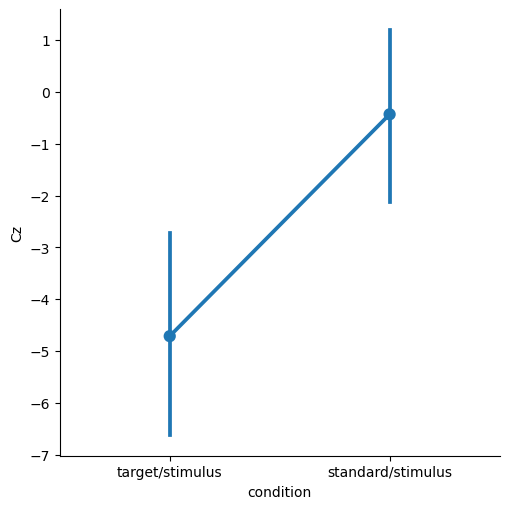

In [176]:
import seaborn as sns
sns.factorplot(y="Cz", data=df_cz, x="condition");

## Main Resource:
- https://github.com/jona-sassenhagen/mne_workshop_amsterdam